In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics, preprocessing
import pandas as pd
import missingno as msno
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from kneed import KneeLocator
import seaborn as sns

pca_data = pd.read_csv('files\pca_data.csv')

C:\Users\admin\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


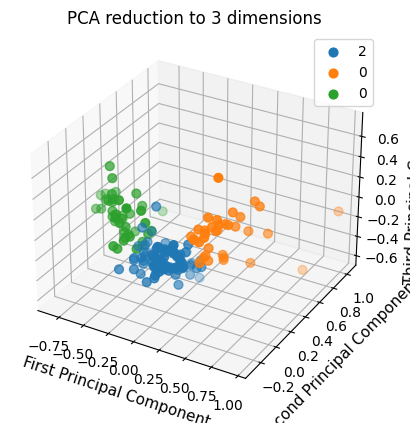

<function matplotlib.pyplot.close(fig=None)>

In [21]:
#Model Build
kmeansmodel = KMeans(n_clusters= 3, init='k-means++', random_state=42)
y_kmeans= kmeansmodel.fit_predict(pca_data)
cluster = kmeansmodel.cluster_centers_
centroids = np.array(cluster)
labels = kmeansmodel.labels_
pca_data['class'] = labels

x = pca_data['component 1'].values
y = pca_data['component 2'].values
z = pca_data['component 3'].values

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for l in np.unique(labels):
    ix=np.where(labels==l)
    ax.scatter(x[ix], y[ix], z[ix], s=40,
           label=labels[l])
ax.set_title("PCA reduction to 3 dimensions")
ax.set_xlabel("First Principal Component", fontsize=11)
ax.set_ylabel("Second Principal Component", fontsize=11)
ax.set_zlabel("Third Principal Component", fontsize=11)
ax.legend()

plt.show()
plt.close

In [26]:
original_dataset = pd.read_csv('files\Country-data.csv')
original_dataset['class'] = labels
print(original_dataset)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  class  
0         9.44        56.2       5.82    553      1  
1  

[1 2 2 1 2 2 2 0 0 2 2 2 2 2 2 0 2 1 2 2 2 2 2 0 2 1 1 2 1 0 2 1 1 2 2 2 1
 1 1 2 1 2 0 0 0 2 2 2 2 1 1 2 2 0 0 1 1 2 0 1 0 2 2 1 1 2 1 2 0 2 2 2 1 0
 0 0 2 0 2 2 1 1 0 2 1 2 2 1 1 2 2 0 2 1 1 2 2 1 0 1 2 2 2 2 2 2 1 2 1 2 0
 0 1 1 0 2 1 2 2 2 2 2 0 0 2 2 1 2 2 1 2 2 1 0 0 0 1 2 0 0 2 2 1 2 0 0 2 1
 2 1 1 2 2 2 2 1 2 0 0 0 2 2 2 2 2 1 1]


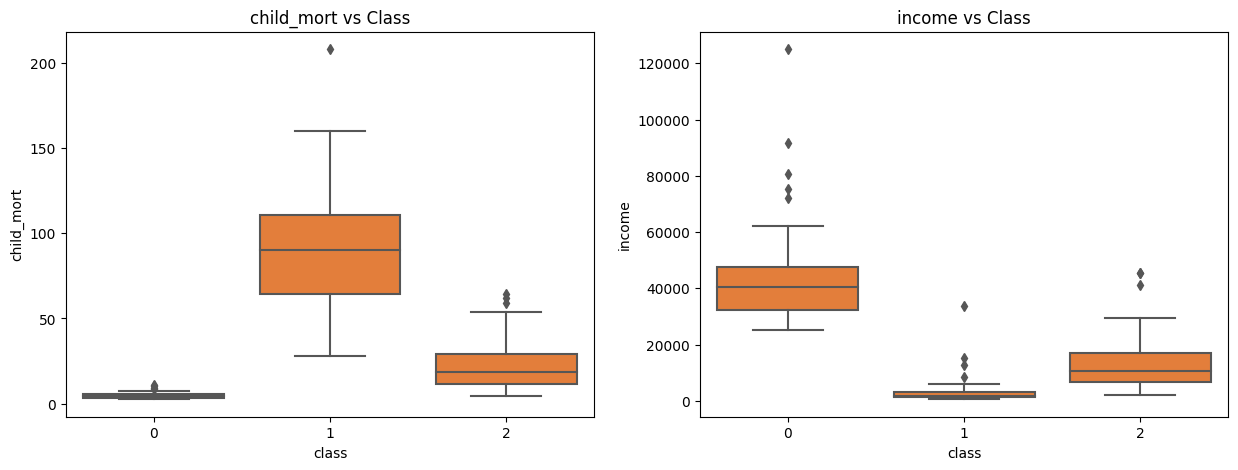

In [27]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

plt.subplot(1,2,1)
print(labels)
sns.boxplot(x = 'class', y = 'child_mort', data  = original_dataset, color = '#FF781F');
plt.title('child_mort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'class', y = 'income', data  = original_dataset, color = '#FF781F');
plt.title('income vs Class')

plt.show()

In [29]:
group_labels = ['doesn\'t need help', 'need help', 'may need help']

for i in range(len(group_labels)):
    original_dataset.loc[original_dataset['class'] == i, 'class'] = group_labels[i]

print(original_dataset)
print(original_dataset.groupby(['class']).count())

original_dataset.to_csv('results\Countries_clustered_by_help_importance.csv', index=False)

                 country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp          class  
0         9.44        56.2       5.82    553     